In [22]:
#importing necessary libraries
import pandas as pd
from pyspark.sql.functions import *
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import descartes

In [13]:
path="s3://finalgeodata/"

In [14]:
df = sc.textFile(path+"sample_geo.txt").map(lambda x: x.replace(' ',',').split(',')).toDF()

In [15]:
#splitting into 3 columns
df=df.withColumn("latitude",split(df._1,"\t").getItem(0)).withColumn("longitude",split(df._1,"\t").getItem(1)).withColumn("locationID",split(df._1,"\t").getItem(2))

In [16]:
#dropping _1 col since it is already extracted
df=df.drop('_1').dropna()

In [17]:
#converting to pandas for easier visualization
df=df.toPandas()

In [18]:
#Dropping to avoid string row i.e header
df=df.drop(0,axis=0)

In [19]:
lon_dat=[]
lat_dat=[]
lon=df['longitude']
lat=df['latitude']
for i in lon:
    lon_dat.append(float(i))
for i in lat:
    lat_dat.append(float(i))

In [20]:
#creation of a new geo dataframe which has geo location point
geometry = [Point(xy) for xy in zip(lon_dat,lat_dat)]
gdf = GeoDataFrame(df, geometry=geometry)  

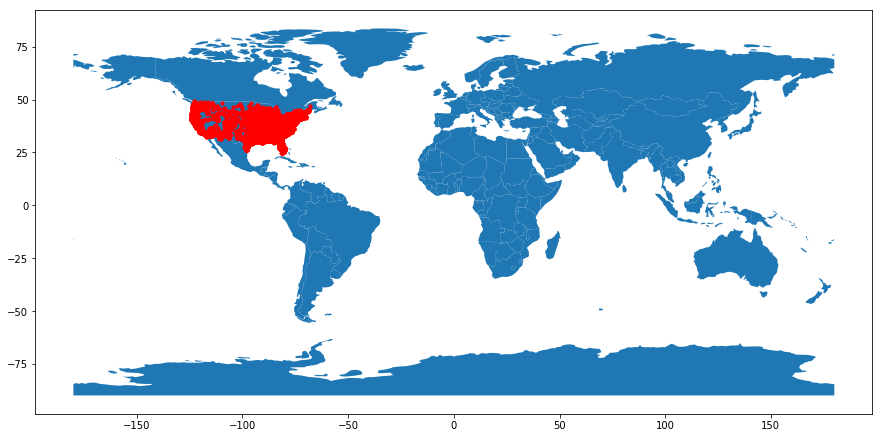

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15,15)), marker='o', color='red', markersize=10)
